In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Aprendizaje Automático II Ingeniería en Sistemas Computacionales/datasets/clean_dataset.csv')
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22.67,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25.25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17.92,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [3]:
# Contando valores duplicados
df.duplicated().value_counts()

False    690
dtype: int64

In [4]:
# Conteo de valores unicos por columna
df.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [5]:
df1 = df.copy()
df1.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [6]:
for col in df.columns:
    if df[col].dtypes == 'object':
        a=df.groupby('Approved')[col].count()
        print(a)
        print('\t')

Approved
0    383
1    307
Name: Industry, dtype: int64
	
Approved
0    383
1    307
Name: Ethnicity, dtype: int64
	
Approved
0    383
1    307
Name: Citizen, dtype: int64
	


In [7]:
import re
special_chars='[@_!#$%^&*()<>?/\|}{~:]' 

for el in special_chars:
    temp_df1=df1["Citizen"].str.count(re.escape(el))
    df1[el]=np.where(temp_df1.gt(0), df1["Citizen"] + " (" + temp_df1.astype(int).astype(str) + ")", None)

df2=df1[list(special_chars)].agg(lambda x: list(x[~x.isna()]))
print('no.of special chars:',df2)
print('count of special characters',df2.sum())

no.of special chars: Empty DataFrame
Columns: [[, @, _, !, #, $, %, ^, &, *, (, ), <, >, ?, /, \, |, }, {, ~, :, ]]
Index: []

[0 rows x 23 columns]
count of special characters [    0.0
@    0.0
_    0.0
!    0.0
#    0.0
$    0.0
%    0.0
^    0.0
&    0.0
*    0.0
(    0.0
)    0.0
<    0.0
>    0.0
?    0.0
/    0.0
\    0.0
|    0.0
}    0.0
{    0.0
~    0.0
:    0.0
]    0.0
dtype: float64


In [8]:
# Emepzamos con el Analisis Exploratiorio de los Datos
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [9]:
# for col in df.columns:
#     if df[col].dtypes == 'object':
#         print('column name:',col)
#         special = '[@_!#$%^&*()<>?/\|}{~:-]'
#         print(df[col].astype('str').str.count(special).sum())
#         df[col] = df[col].fillna('').astype(str).str.replace(special, '', regex=True).replace('', np.nan, regex=False)

int64      10
float64     3
object      3
dtype: int64


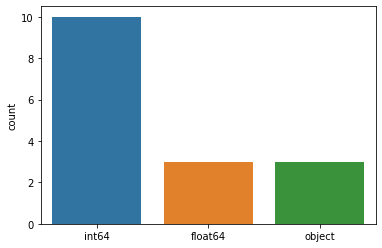

In [10]:
# Visualizamos los diferentes tipos de datos que hay en el dataset y su cantidad.
print(df.dtypes.value_counts())
sns.countplot(df.dtypes.map(str))
plt.show()

0    383
1    307
Name: Approved, dtype: int64


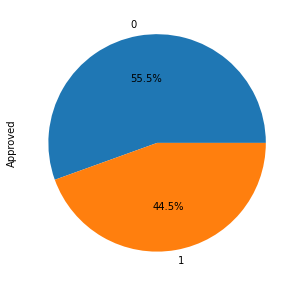

In [11]:
# Visualizamos la diferencia entre los aprovados y no aprovados 
print(df['Approved'].value_counts())
df['Approved'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(5,5))
plt.show()

In [12]:
# Validamos la cantidad de valores nulos por columna
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [13]:
# Aplicamos LabelEncoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes == object:
        df[col]= le.fit_transform(df[col])

In [14]:
# Separamos los valores de nuestro data ser para tener nuestros datos y las clasificaciones finales
x=df.drop('Approved',axis=1)
y=df['Approved']

In [15]:
# Aplicamos train_test_split para crear valores de prueba y de entrenamiendo a un 30%
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [16]:
print("x shape:", x_train.shape)
print("y shape:", y_train.shape)

x shape: (483, 15)
y shape: (483,)


In [17]:
# Ahora aplicamos StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

In [18]:
# Ahora aplicamos el modelo de Regresión Logísitca
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=42)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [19]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1])

In [20]:
a=pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})
a

,actual_value,predicted_value
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0
...,...,...
601,0,0
66,1,1
11,1,1
674,0,0


In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.81      0.86      0.83        97

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

[[90 20]
 [14 83]]


In [22]:
log_acc=accuracy_score(y_test,y_pred)*100
log_acc

83.57487922705315

In [23]:
# Prdecimos la variable y usando features
result = classifier.predict(np.array([[1,22,5.6,1,1,5,3,4.5,0,2,0,1,203,450,1]]))
result

array([1])

In [24]:
# Ahora aplicamos el RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42,max_features=15)
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=15, random_state=42)

In [25]:
# Hacemos las predicciones con RandomForestClassifier
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1])

In [26]:
pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred_rf})

,actual_value,predicted_value
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0
...,...,...
601,0,0
66,1,1
11,1,1
674,0,0


In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred_rf)
print(classification_report(y_test,y_pred_rf))
print(cm)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.82      0.87      0.84        97

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

[[92 18]
 [13 84]]


In [28]:
# Performance del modelo de RandomForestClassifier
rf_acc = accuracy_score(y_test,y_pred_rf)*100
rf_acc

85.02415458937197

In [29]:
# Predecimos de y usando los features de x
result = rf.predict(np.array([[1,22,5.6,1,1,5,3,4.5,0,2,0,1,203,450,1]]))
result

array([1])

In [30]:
# Ahora usamos Maquinas de Soporte Vectorial
from sklearn import svm
svm = svm.SVC(kernel='linear',C = 0.01)
svm.fit(x_train,y_train)

SVC(C=0.01, kernel='linear')

In [31]:
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1])

In [32]:
pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred_svm})

,actual_value,predicted_value
286,0,0
511,1,1
257,0,0
336,0,0
318,1,0
...,...,...
601,0,0
66,1,1
11,1,1
674,0,0


In [33]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(y_test,y_pred_svm)
print(classification_report(y_test,y_pred_svm))
print(cm)

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       110
           1       0.78      0.92      0.84        97

    accuracy                           0.84       207
   macro avg       0.85      0.85      0.84       207
weighted avg       0.85      0.84      0.84       207

[[85 25]
 [ 8 89]]


In [34]:
# Performance del modelo con SVM
svm_acc = accuracy_score(y_test,y_pred_svm)*100
svm_acc 

84.05797101449275

In [35]:
result = svm.predict(np.array([[1,29,9,0,0,6,3,4.5,0,3,0,1,203,590,1]]))
result

array([0])

In [36]:
# Ahora hacemos la prediccion con el modelo de AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
abcModel = abc.fit(x_train, y_train)
y_pred = abcModel.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred)*100)
abc_acc = accuracy_score(y_test, y_pred)*100

AdaBoost Classifier Model Accuracy: 81.15942028985508


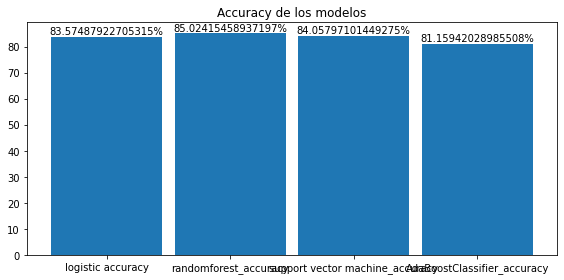

In [38]:
# Visualizamos mediante una grafica la diferenia de performance de accuracy entre cada modelo.
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

x=['logistic accuracy','randomforest_accuracy','support vector machine_accuracy', 'AdaBoostClassifier_accuracy']
y=[log_acc,rf_acc,svm_acc,abc_acc]

width = 0.9
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
   height = p.get_height()
   ax.text(x=p.get_x() + p.get_width() / 2, y=height+1,
      s="{}%".format(height),
      ha='center')
plt.title('Accuracy de los modelos')
plt.show()